In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.api as sm
from scipy import stats


In [ ]:
datos_train = pd.read_csv("/content/dataset_ts_ventas_train.csv")
datos_test = pd.read_csv("/content/dataset_ts_ventas_test.csv")

In [ ]:
datos_train.head()
#type(data_train.iloc[0, 0])

,ds,precio_ref,unidades_total,monto_total
0,2017-01-01,990.0,158,142740
1,2017-01-02,990.0,152,137180
2,2017-01-03,990.0,125,115390
3,2017-01-04,990.0,107,98710
4,2017-01-05,990.0,103,96270


In [ ]:
datos_train

,ds,precio_ref,unidades_total,monto_total
0,2017-01-01,990.0,158,142740
1,2017-01-02,990.0,152,137180
2,2017-01-03,990.0,125,115390
3,2017-01-04,990.0,107,98710
4,2017-01-05,990.0,103,96270
...,...,...,...,...
1849,2022-01-27,1100.0,63,68510
1850,2022-01-28,1100.0,85,93088
1851,2022-01-29,1100.0,95,103920
1852,2022-01-30,1100.0,62,67375


In [ ]:
datos_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ds              1854 non-null   object 
 1   precio_ref      1854 non-null   float64
 2   unidades_total  1854 non-null   int64  
 3   monto_total     1854 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 58.1+ KB


In [ ]:
datos_fechas = pd.date_range(start = "2017-01-01", end = "2022-01-31", freq = "D")

In [ ]:
print((3/1857)*100)

0.16155088852988692


In [ ]:
datos_fechas

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', length=1857, freq='D')

In [ ]:
datos_test.head()

,ds,precio_ref,unidades_total,monto_total
0,2022-02-01,1100.0,44,48400
1,2022-02-02,1100.0,84,92255
2,2022-02-03,1100.0,52,57055
3,2022-02-04,1100.0,79,86755
4,2022-02-05,1100.0,84,92110


In [ ]:
datos_test["ds"] = pd.to_datetime(datos_test["ds"], format = "%Y/%m/%d")
test = datos_test.set_index("ds")
test = test.rename(columns = {"ds": "fecha", "precio_ref": "precio", 
                                "unidades_total": "unidades", 
                                "monto_total": "ingreso_total"})
#test = test.asfreq("D", how = {"2022-02-01", "2022-02-28"})
test = test.sort_index()
print(test)

            precio  unidades  ingreso_total
ds                                         
2022-02-01  1100.0        44          48400
2022-02-02  1100.0        84          92255
2022-02-03  1100.0        52          57055
2022-02-04  1100.0        79          86755
2022-02-05  1100.0        84          92110
2022-02-06  1100.0        64          70110
2022-02-07  1100.0        50          54855
2022-02-08  1100.0        63          69010
2022-02-09  1100.0        64          70400
2022-02-10  1100.0        70          76733
2022-02-11  1100.0        90          98710
2022-02-12  1100.0        88          96800
2022-02-13  1100.0        74          81133
2022-02-14  1100.0        63          68720
2022-02-15  1100.0        67          73410
2022-02-16  1100.0        62          67910
2022-02-17  1100.0        80          87298
2022-02-18  1100.0       113         124155
2022-02-19  1100.0       171         187955
2022-02-20  1100.0       145         158775
2022-02-21  1100.0        85    

In [ ]:
datos_train["ds"] = pd.to_datetime(datos_train["ds"], format = "%Y/%m/%d")
train = datos_train.set_index("ds")
train = train.rename(columns = {"ds": "fecha", "precio_ref": "precio", 
                                "unidades_total": "unidades", 
                                "monto_total": "ingreso_total"})
#datos = datos.asfreq("D", how = {"2017-01-01", "2022-01-30"})
train = train.sort_index()


In [ ]:
print(f'Número de filas con missing values: {train.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


In [ ]:
print(train)

            precio  unidades  ingreso_total
ds                                         
2017-01-01   990.0       158         142740
2017-01-02   990.0       152         137180
2017-01-03   990.0       125         115390
2017-01-04   990.0       107          98710
2017-01-05   990.0       103          96270
...            ...       ...            ...
2022-01-27  1100.0        63          68510
2022-01-28  1100.0        85          93088
2022-01-29  1100.0        95         103920
2022-01-30  1100.0        62          67375
2022-01-31  1100.0        68          74100

[1854 rows x 3 columns]


In [ ]:
train["Año"] = train.index.year
train["Mes"] = train.index.month_name()
train["Dia"] = train.index.day_name()
#train["Dia"] = train.index.

In [ ]:
print(train)

            precio  unidades  ingreso_total   Año      Mes        Dia
ds                                                                   
2017-01-01   990.0       158         142740  2017  January     Sunday
2017-01-02   990.0       152         137180  2017  January     Monday
2017-01-03   990.0       125         115390  2017  January    Tuesday
2017-01-04   990.0       107          98710  2017  January  Wednesday
2017-01-05   990.0       103          96270  2017  January   Thursday
...            ...       ...            ...   ...      ...        ...
2022-01-27  1100.0        63          68510  2022  January   Thursday
2022-01-28  1100.0        85          93088  2022  January     Friday
2022-01-29  1100.0        95         103920  2022  January   Saturday
2022-01-30  1100.0        62          67375  2022  January     Sunday
2022-01-31  1100.0        68          74100  2022  January     Monday

[1854 rows x 6 columns]


In [ ]:
ingreso_calculado = train["precio"]*train["unidades"]

In [ ]:
print(ingreso_calculado)

ds
2017-01-01    156420.0
2017-01-02    150480.0
2017-01-03    123750.0
2017-01-04    105930.0
2017-01-05    101970.0
                ...   
2022-01-27     69300.0
2022-01-28     93500.0
2022-01-29    104500.0
2022-01-30     68200.0
2022-01-31     74800.0
Length: 1854, dtype: float64


In [ ]:
train_calculo = train.insert(loc = 3, column = "ingreso_calculado", value = ingreso_calculado)

In [ ]:
print(train)

            precio  unidades  ingreso_total  ingreso_calculado   Año      Mes  \
ds                                                                              
2017-01-01   990.0       158         142740           156420.0  2017  January   
2017-01-02   990.0       152         137180           150480.0  2017  January   
2017-01-03   990.0       125         115390           123750.0  2017  January   
2017-01-04   990.0       107          98710           105930.0  2017  January   
2017-01-05   990.0       103          96270           101970.0  2017  January   
...            ...       ...            ...                ...   ...      ...   
2022-01-27  1100.0        63          68510            69300.0  2022  January   
2022-01-28  1100.0        85          93088            93500.0  2022  January   
2022-01-29  1100.0        95         103920           104500.0  2022  January   
2022-01-30  1100.0        62          67375            68200.0  2022  January   
2022-01-31  1100.0        68

In [ ]:
diferencia = train["ingreso_calculado"] - train["ingreso_total"]

In [ ]:
train_prueba = train.insert(loc = 4, column = "diferencia", value = diferencia)

In [ ]:
print(train)

            precio  unidades  ingreso_total  ingreso_calculado  diferencia  \
ds                                                                           
2017-01-01   990.0       158         142740           156420.0     13680.0   
2017-01-02   990.0       152         137180           150480.0     13300.0   
2017-01-03   990.0       125         115390           123750.0      8360.0   
2017-01-04   990.0       107          98710           105930.0      7220.0   
2017-01-05   990.0       103          96270           101970.0      5700.0   
...            ...       ...            ...                ...         ...   
2022-01-27  1100.0        63          68510            69300.0       790.0   
2022-01-28  1100.0        85          93088            93500.0       412.0   
2022-01-29  1100.0        95         103920           104500.0       580.0   
2022-01-30  1100.0        62          67375            68200.0       825.0   
2022-01-31  1100.0        68          74100            74800.0  

In [ ]:
train_xxx = train.copy()

In [ ]:
train_xxx["precio_real"] = train_xxx["ingreso_total"]/train_xxx["unidades"]

In [ ]:
train_xxx

,precio,unidades,ingreso_total,ingreso_calculado,diferencia,Año,Mes,Dia,precio_real
ds,,,,,,,,,
2017-01-01,990.0,158,142740,156420.0,13680.0,2017,January,Sunday,903.417722
2017-01-02,990.0,152,137180,150480.0,13300.0,2017,January,Monday,902.500000
2017-01-03,990.0,125,115390,123750.0,8360.0,2017,January,Tuesday,923.120000
2017-01-04,990.0,107,98710,105930.0,7220.0,2017,January,Wednesday,922.523364
2017-01-05,990.0,103,96270,101970.0,5700.0,2017,January,Thursday,934.660194
...,...,...,...,...,...,...,...,...,...
2022-01-27,1100.0,63,68510,69300.0,790.0,2022,January,Thursday,1087.460317
2022-01-28,1100.0,85,93088,93500.0,412.0,2022,January,Friday,1095.152941
2022-01-29,1100.0,95,103920,104500.0,580.0,2022,January,Saturday,1093.894737


In [ ]:
ax.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)

In [ ]:
import matplotlib as mpl
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)


In [ ]:
(1150-990)/990

0.16161616161616163

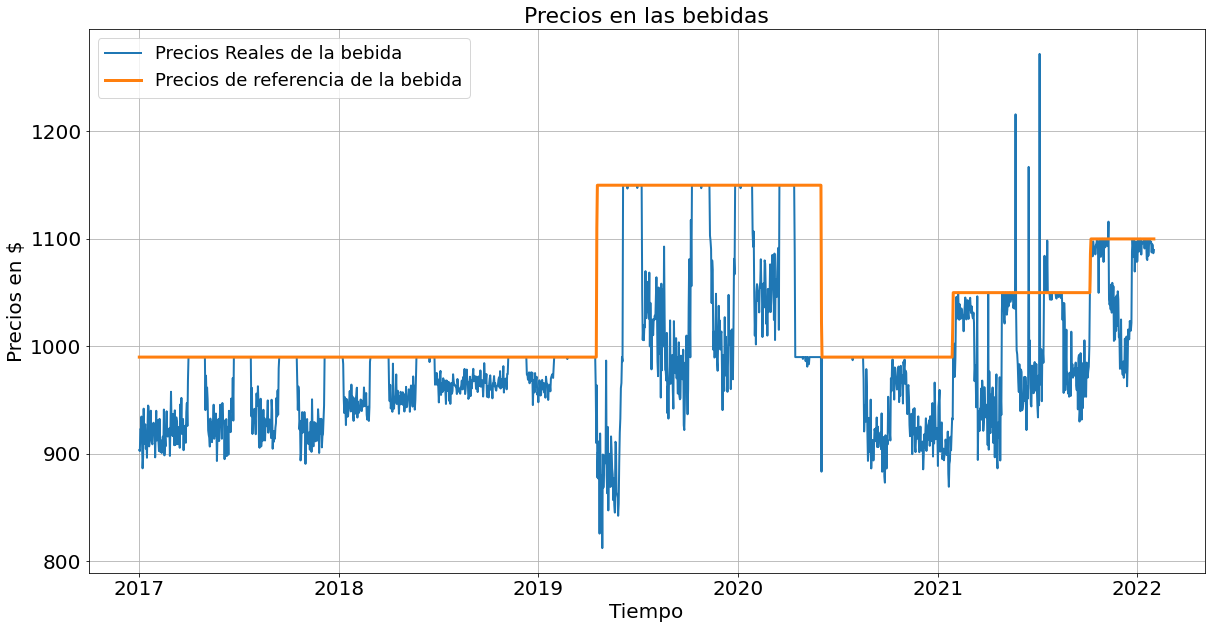

In [ ]:
tiempo = 30


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_xxx["precio_real"] , label = "Precios Reales de la bebida", linewidth=2);
ax.plot(train_xxx["precio"] , label = "Precios de referencia de la bebida", linewidth=3);
ax.legend(fontsize=18);
ax.grid();
ax.set_ylabel("Precios en $",fontsize=20)
ax.set_xlabel("Tiempo",fontsize=20)
ax.set_title("Precios en las bebidas",fontsize=22);

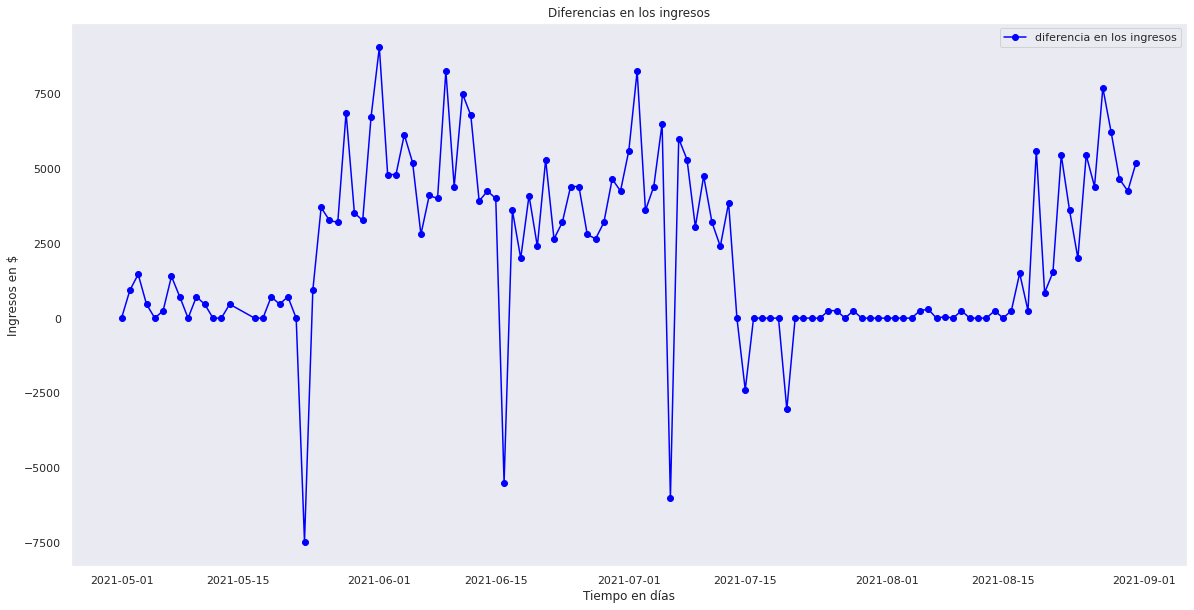

In [ ]:
tiempo = 30

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["diferencia"].loc["2021-05":"2021-08"], c = "blue" , label = "diferencia en los ingresos", marker = "o");
ax.legend();
ax.grid();
ax.set_ylabel("Ingresos en $")
ax.set_xlabel("Tiempo en días")
ax.set_title("Diferencias en los ingresos");

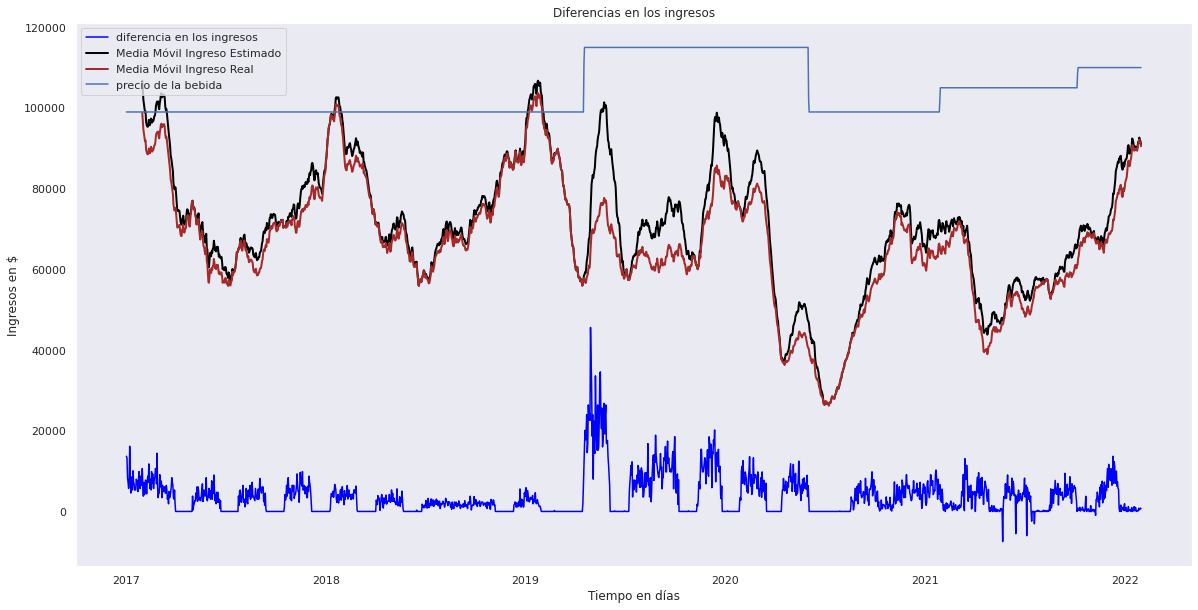

In [ ]:
tiempo = 30

fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(train["ingreso_total"], c = "red", label = "Ingreso Real")
#ax.plot(train["ingreso_calculado"], c = "green", label = "Ingreso Estimado", alpha = 1)
ax.plot(train["diferencia"], c = "blue" , label = "diferencia en los ingresos");
ax.plot(train["ingreso_calculado"].rolling(tiempo).mean(), c = "black", label = "Media Móvil Ingreso Estimado", linewidth=2)
ax.plot(train["ingreso_total"].rolling(tiempo).mean(), c = "brown", label = "Media Móvil Ingreso Real", linewidth=2)
ax.plot(train["precio"]*100, label = "precio de la bebida", )
ax.legend();
ax.grid();
ax.set_ylabel("Ingresos en $")
ax.set_xlabel("Tiempo en días")
ax.set_title("Diferencias en los ingresos");

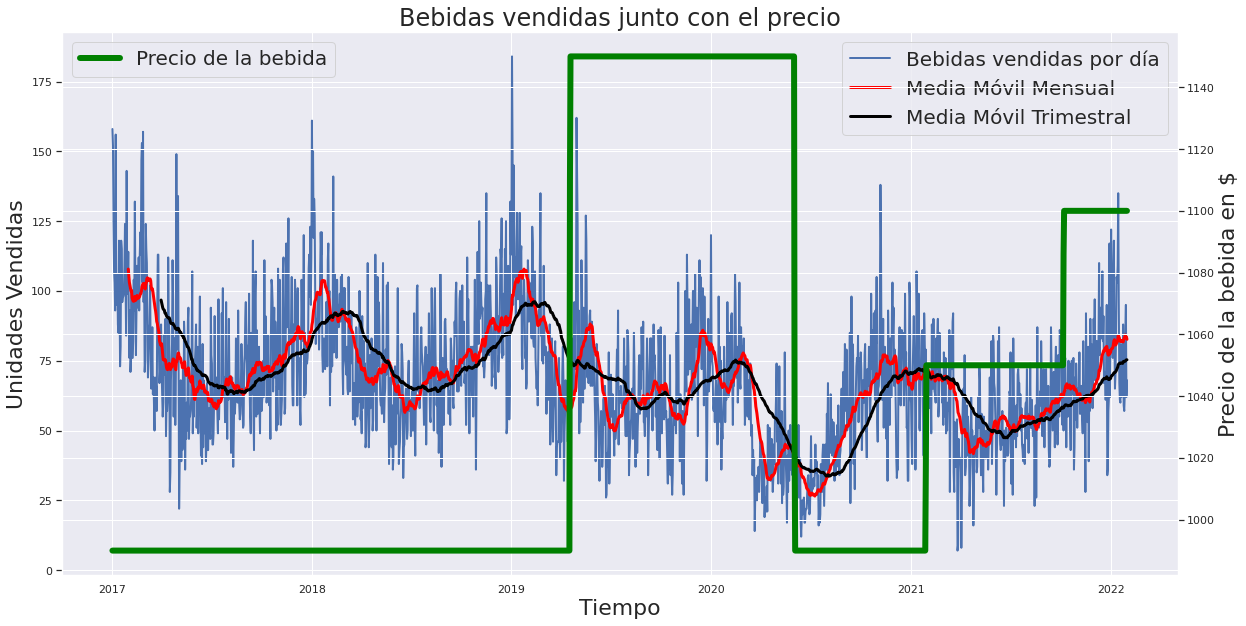

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
#ax2 = ax.twinx()
twin_axes = ax.twinx()

#ax.plot(train["ingreso_total"], c = "red", label = "Ingreso Real")
#ax.plot(train["ingreso_calculado"], c = "green", label = "Ingreso Estimado", alpha = 1)
#a = ax.plot(train["diferencia"], c = "blue" , label = "diferencia en los ingresos");
ax.plot(train["unidades"], label = "Bebidas vendidas por día", linewidth=2)
ax.plot(train["unidades"].rolling(30).mean(), c = "red", label = "Media Móvil Mensual", linewidth=3)
ax.plot(train["unidades"].rolling(90).mean(), c = "black", label = "Media Móvil Trimestral", linewidth=3)
twin_axes.plot(train["precio"], c = "green", label = "Precio de la bebida", linewidth=6)
twin_axes.set_ylabel("Precio de la bebida en $", fontsize=22)
ax.legend(fontsize=20);
twin_axes.legend(loc = "upper left", fontsize=20)
#twin_axes.legend();
ax.set_ylabel("Unidades Vendidas",fontsize=22)
ax.set_xlabel("Tiempo", fontsize=22)
ax.set_title("Bebidas vendidas junto con el precio",fontsize=24);

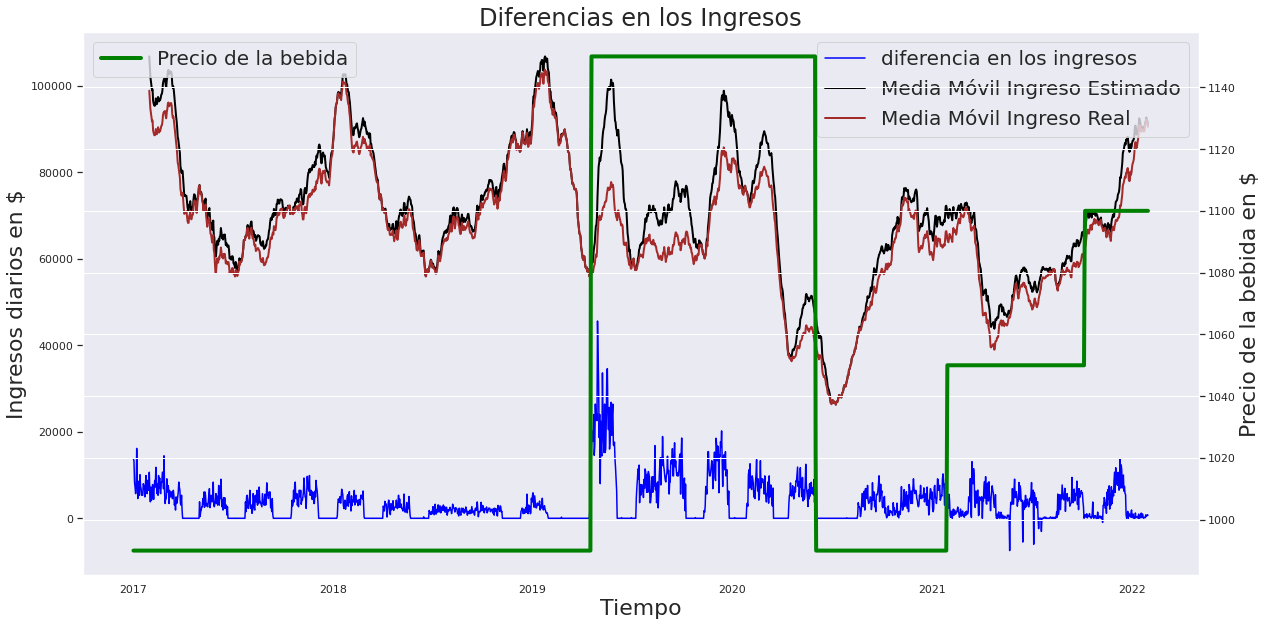

In [ ]:
tiempo = 30

fig, ax = plt.subplots(figsize=(20, 10))
#ax2 = ax.twinx()
twin_axes = ax.twinx()

#ax.plot(train["ingreso_total"], c = "red", label = "Ingreso Real")
#ax.plot(train["ingreso_calculado"], c = "green", label = "Ingreso Estimado", alpha = 1)
a = ax.plot(train["diferencia"], c = "blue" , label = "diferencia en los ingresos");
ax.plot(train["ingreso_calculado"].rolling(tiempo).mean(), c = "black", label = "Media Móvil Ingreso Estimado", linewidth=2)
ax.plot(train["ingreso_total"].rolling(tiempo).mean(), c = "brown", label = "Media Móvil Ingreso Real", linewidth=2)
twin_axes.plot(train["precio"], c = "green", label = "Precio de la bebida", linewidth=4)
twin_axes.set_ylabel("Precio de la bebida en $", fontsize=22)
ax.legend(fontsize=20);
twin_axes.legend(loc = "upper left", fontsize=20)
#twin_axes.legend();
ax.grid();
ax.set_ylabel("Ingresos diarios en $",fontsize=22)
ax.set_xlabel("Tiempo", fontsize=22)
ax.set_title("Diferencias en los Ingresos",fontsize=24);

#Análisis de las diferencias en los ingresos percibidos:
En un primer acercamiento, notamos que al analizar los datos, existe el ingreso total que es lo que realmente gana al dia el local de ventas de bebidas, pero en el dataset tenemos la informacion del precio diario de cada bebida y del numero de bebidas vendidas, si multiplicamos el precio (P) de cada bebida por el numero de bebidas vendidas (B) obtendriamos el ingreso Estimado que es lo que deberia ganar el local y esta dado por la siguiente ecuación:
Ingreso Estimado = Precio * Bebidas Vendidas.
Pero lo que sucede es que al observar los datos, el Ingreso Total es diferente del Ingreso Estimado diario, esto es observable en la grafica adjunta, a traves de la media movil mensual entre en Ingreso Total y el Ingreso Estimado, esta diferencia entre los dos ingresos, se debe a la implementacion por parte de la empresa de un sistema de descuentos en el precio que cobra el local por cada bebida vendida.
Tambien es posible notar que a partir del 18 de abril del 2019, hasta aprximadamente el 2 de junio del 2020, el precio de las bebidas sube de $990 a $1150, sube $160, lo que produce una mayor diferencia entre el Ingreso Total y el Ingreso Estimado, esto puede deverse a que al subir el precio, la demanda disminuye ya que las personas no estan dispuestas a pagar $160 pesos adicionales por bebida y a que ademas es epoca de invierno, donde las personas no consumen tanta bebida, por lo cual, el local se ve obligado a realizar unos descuentos mas atractivos para las personas, esto se marca mucho desde la quincena de abril del 2019 a la primera semana de Junio, esto puede deverse a que la subida de precios se realizo durante meses de invierno, durante los cuales la demanda es baja, y por ende al subir el precio, la demanda es mas baja aun, y para mantener los Ingresos Totales dentro de los margenes que espera la compañia, es natural que la empresa impusiera mayores descuentos para recuperar la demanda.
Esto ultimo es notable ya que desde el 28 de enero del 2021 tambien se registra una subida en el precio del producto, pero al ser esta subida de tan solo $60 pesos por bebida, los descuentos que imponen son bajos, lo cual es bastante positivo para la empresa, esto se debe a que la subida en el precio de la bebida es bajo (solo $60) y a que esta subida en el precio se registra en epoca de verano, donde las personas estan dispuestas a pagar $60 pesos adicionales por bebida.

Adicionalmente es posible detectar 4 dias durante los meses de invierno del 2021, donde el Ingreso Total es mayor que el Ingreso Estimado, esto puede deberse a alzas puntuales en el precio de la bebida en esos 4 dias. las cuales se registran en promedio durante medidos de cada mes y podrian explicarse como una subida puntual en el precio de la bebida, debido a eventos en el litoral central o fiestas realizadas en los alrededores.

#Situacion por año

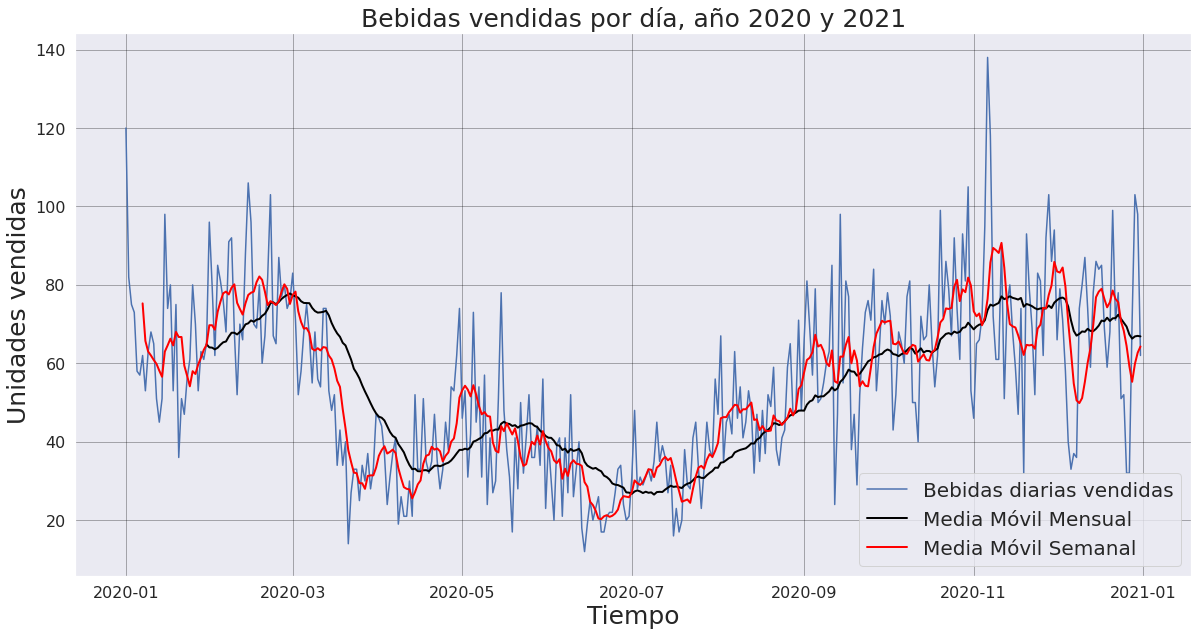

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["unidades"].loc["2020"], label = "Bebidas diarias vendidas");
ax.plot(train["unidades"].loc["2020"].rolling(30).mean(), c = "black", label = "Media Móvil Mensual", linewidth=2)
ax.plot(train["unidades"].loc["2020"].rolling(7).mean(), c = "red", label = "Media Móvil Semanal", linewidth=2)
ax.legend(fontsize = 20)
ax.grid(b = 2, color = "black", alpha = 0.3)
ax.set_ylabel("Unidades vendidas", fontsize=25)
ax.set_xlabel("Tiempo", fontsize=25)
ax.set_title("Bebidas vendidas por día, año 2020 y 2021", fontsize=25);

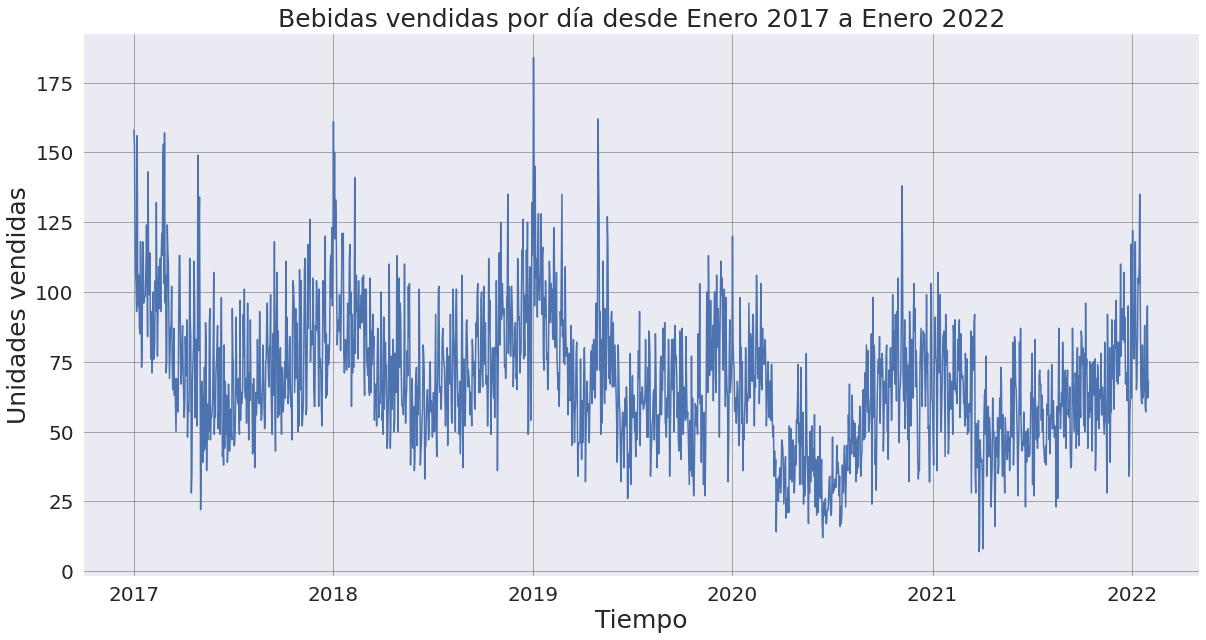

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["unidades"]);
ax.grid(b = 2, color = "black", alpha = 0.3)
ax.set_ylabel("Unidades vendidas", fontsize=25)
ax.set_xlabel("Tiempo", fontsize=25)
ax.set_title("Bebidas vendidas por día desde Enero 2017 a Enero 2022", fontsize=25);

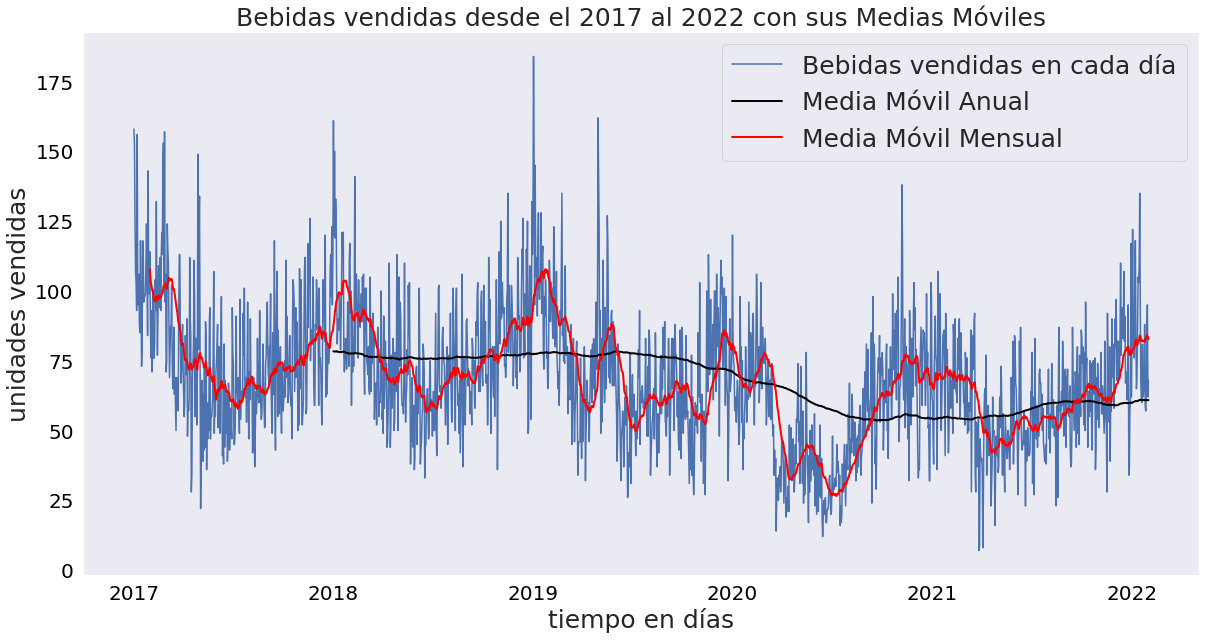

In [ ]:


fig, ax = plt.subplots(figsize=(20, 10))
ax.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='r', grid_alpha=0.5)
ax.plot(train["unidades"], label = "Bebidas vendidas en cada día");
ax.plot(train["unidades"].rolling(365).mean(), c = "black", label = "Media Móvil Anual", linewidth=2)
ax.plot(train["unidades"].rolling(30).mean(), c = "red", label = "Media Móvil Mensual", linewidth=2)
#ax.plot(train["unidades"].rolling(7).mean(), c = "yellow", label = "media movil Semanal", linewidth=2, alpha = 0.5)
ax.legend(fontsize=25);
ax.grid();
ax.set_ylabel("unidades vendidas", fontsize=25)
ax.set_xlabel("tiempo en días", fontsize=25)
ax.set_title("Bebidas vendidas desde el 2017 al 2022 con sus Medias Móviles", fontsize=25);

#Analisis de las bebidas vendidas a lo largo del tiempo:
A partir del grafico anterior, es posible observar que el numero de bebidas vendidas desde enero del 2017 a enero del 2022 presenta una estacionalidad en los datos, es decir, que para cada año, en los meses de verano (enero y febrero) existe un aumento considerable en el numero de bebidas vendidas y en los demas meses del año, las ventas decrecen, esto es debido a la ubicacion del local de venta de bebidas, el cual se encuentra en el litoral central y la demanda claramente sera mayor en los meses de verano debido a las vacaciones que en aquellos meses que comprenden desde marzo a diciembre.
Tambien es posible observar que en el mes de Junio es donde se registran las menores ventas de bebidas y a partir de este mes, comienza a subir la demanda de bebidas hasta llegar a la meseta ubicada en los meses de verano, esto ultimo lo podemos evidenciar con la media movil mensual la cual es alta en los meses de verano y baja en los meses de invierno, ademas con esta media movil anual y mensual podemos observar el efecto de la pendemia en las ventas, ya que las cuarentenas establecidas en el pais, hacen disminuir los viajes y el turismo al litoral central y con ello, tambien disminuye la demanda en la bebida, situacion que se aprecia notablemente desde principios del 2020 hasta los meses de enero y febrero del 2021, ya desde marzo del 2021 comienza a volver a repuntar la demanda por las bebidas, pero el periodo mas critico de ventas ocurre durante los meses de invierno del año 2020, periodo marcado por las estrictas restricciones en cuarentena y aislamientos por el covid-19, tal como lo muestra la media movil mensual en el gráfico adjunto.

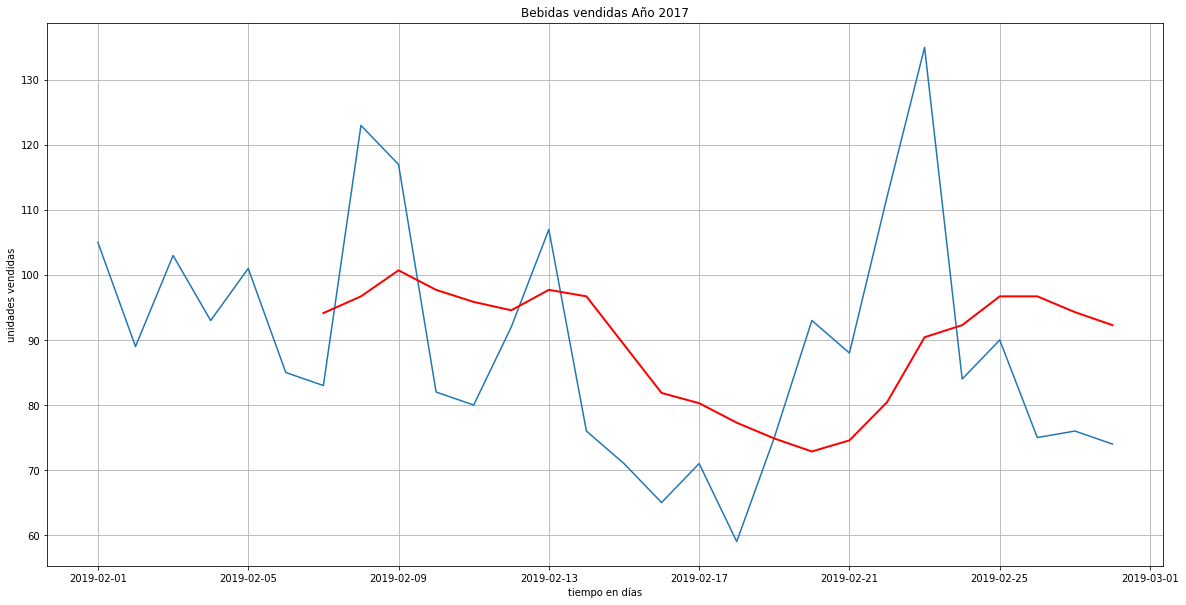

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["unidades"].loc["2019-02"]);
ax.plot((train["unidades"].loc["2019-02"]).rolling(7).mean(), c = "red", label = "Media Móvil Semanal", linewidth=2)
ax.grid();
ax.set_ylabel("unidades vendidas")
ax.set_xlabel("tiempo en días")
ax.set_title("Bebidas vendidas Año 2017");

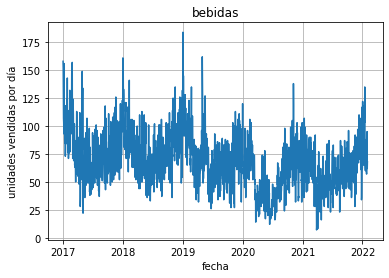

In [ ]:
plt.plot(train["unidades"], label = "unidades totales de train", alpha = 1)
plt.grid()
plt.title("bebidas")
plt.xlabel("fecha")
plt.ylabel("unidades vendidas por día")
plt.show()

# Analisis descriptivo de los datos:
A partir del grafico "Unidades vendidas por dia", se observa que para todo el periodo comprendido entre el 1 de enero del 2017 al 31 de enero del 2022 (conjunto de entrenamiento), la cantidad de unidades vendidas de la bebida experimenta crecimientos en la temporada de verano, para cada año, si observamos la grafica, tiene un movimiento oscilante o de onda (presenta estacionalidad), donde los picos (maximos valores de unidades vendidas) se encuentran siempre cuando nos encontramos entre los meses de diciembre a febrero y sus valles (minimos valores de unidades vendidas) se encuentran durante la epoca entre marzo a noviembre, este fenomeno ocurre para cada año, y es producto de que el producto se comercializa en un lugar cercano a la costa (litoral central) y durante epocas de verano la demanda del producto aumenta considerablemente.

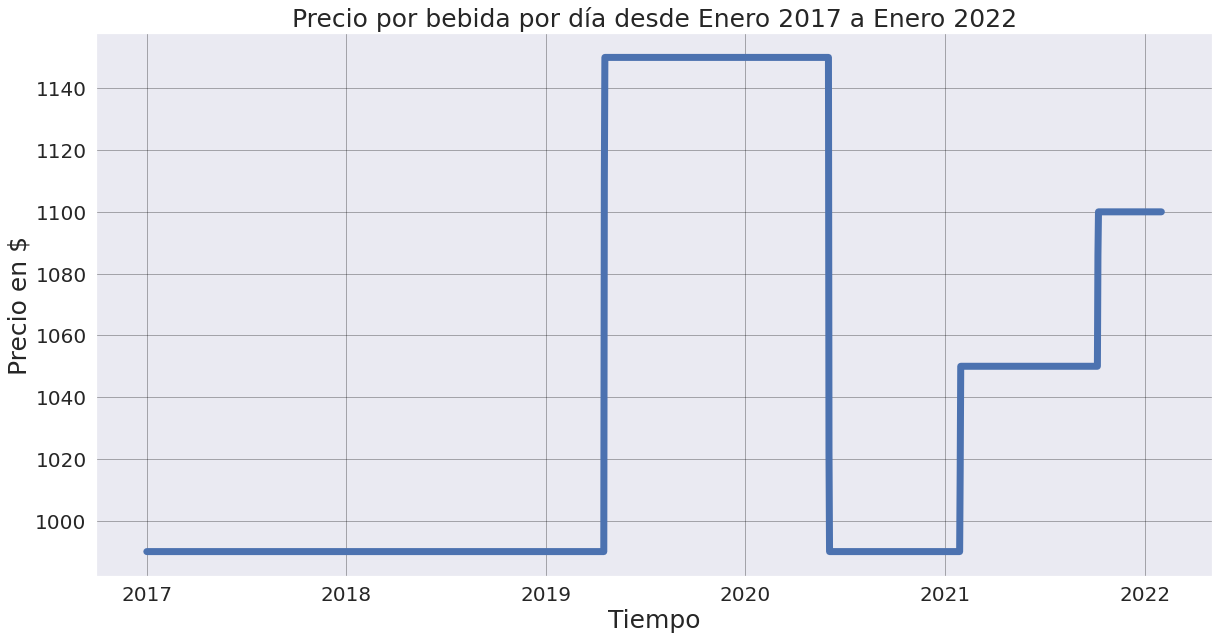

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["precio"], linewidth=7);
ax.grid(b = 2, color = "black", alpha = 0.3)
ax.set_ylabel("Precio en $", fontsize=25)
ax.set_xlabel("Tiempo", fontsize=25)
ax.set_title("Precio por bebida por día desde Enero 2017 a Enero 2022", fontsize=25);

In [ ]:
ax.plot(train["unidades"].rolling(365).mean(), c = "black", label = "Media Móvil Anual", linewidth=2)

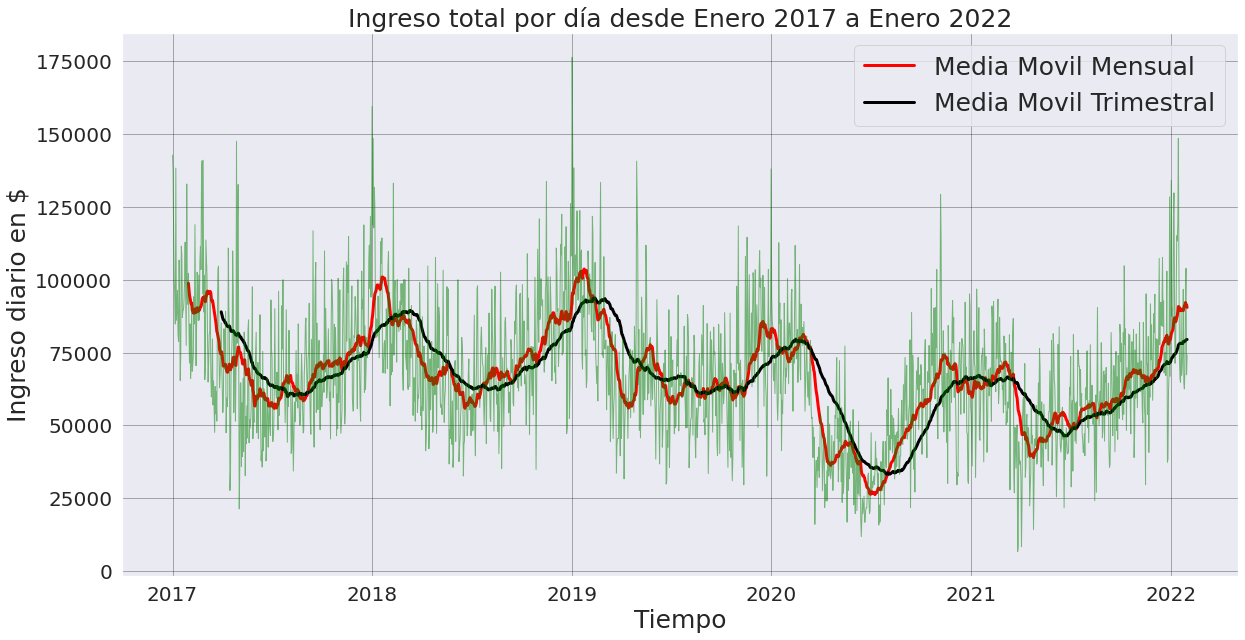

In [ ]:
import matplotlib as mpl
params = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
mpl.rcParams.update(params)


fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["ingreso_total"].rolling(30).mean(), c = "red", label = "Media Movil Mensual", linewidth=3);
ax.plot(train["ingreso_total"].rolling(90).mean(), c = "black", label = "Media Movil Trimestral", linewidth=3);
ax.plot(train["ingreso_total"], linewidth=1, color = "green", alpha = 0.5);
ax.grid(b = 2, color = "black", alpha = 0.3)
ax.legend(fontsize=25);
ax.set_ylabel("Ingreso diario en $", fontsize=25)
ax.set_xlabel("Tiempo", fontsize=25)
ax.set_title("Ingreso total por día desde Enero 2017 a Enero 2022", fontsize=25);

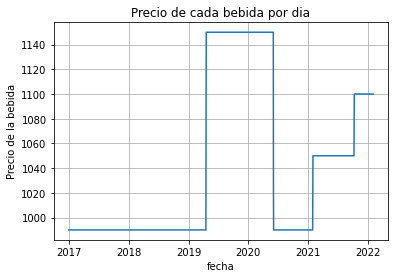

In [ ]:
plt.plot(train["precio"], label = "Precio por día del train")
plt.grid()
plt.title("Precio de cada bebida por dia")
plt.xlabel("fecha")
plt.ylabel("Precio de la bebida")
plt.show()

#Analisis del precio en el tiempo:
Segun el grafico de "Precio de cada bebida por día, podemos observar que el precio de la bebida aumenta desde mediados de abril del 2019 en un 16% aproximadamente, este aumento se registra en un escenario antes de la pandemia y antes del estallido social, pero podemos observar que durante el estallido y durante los meses mas criticos de la pandemia, este incremento en el precio de mantiene, y el precio de la bebida no baja, hasta llegado el mes de junio del 2020, donde el precio de la bebida vuelve a bajar, esta subida en el precio puede deberse a la incertidumbre economica que ha producido la pandemia covid 19, ya que justo en este periodo (mes de abril del 2019 al mes de junio del 2020) se experimenta una caida en la demanda de bebidas, y para poder mantener los ingresos netos en niveles optimos se opto la decision de subir el precio. 
Ademas desde el 28 de febrero del 2021, los precios vuelven a aumentar, esto es debido al escenario de incertibumbre economica que produce la pandemia ya que la situacion de cuarentena afecta directamente al mercado turistico, y eso produce una disminucion de la demanda en la bebida, producto de esta situacion, el precio aumenta para poder mantener los beneficios y este incremento en el precio es sostenido (desde febrero del 2021), debido a que la demanda de bebida desde el 2021 a ido a la baja, con picos en la epoca de verano, pero en promedio es la baja, y esa situacion explica el comportamiento ascendente que tiene el precio de la bebida. Tambien el precio de la bebida desde fines del 2021 experimenta una subida, la cual puede ser explicada por el fin de las restricciones de cuarentena y el aumento en las playas de los veraniantes en el litoral central, los cuales aumentan la demanda de bebida en epoca de verano y esto hace subir los precios de la bebida.


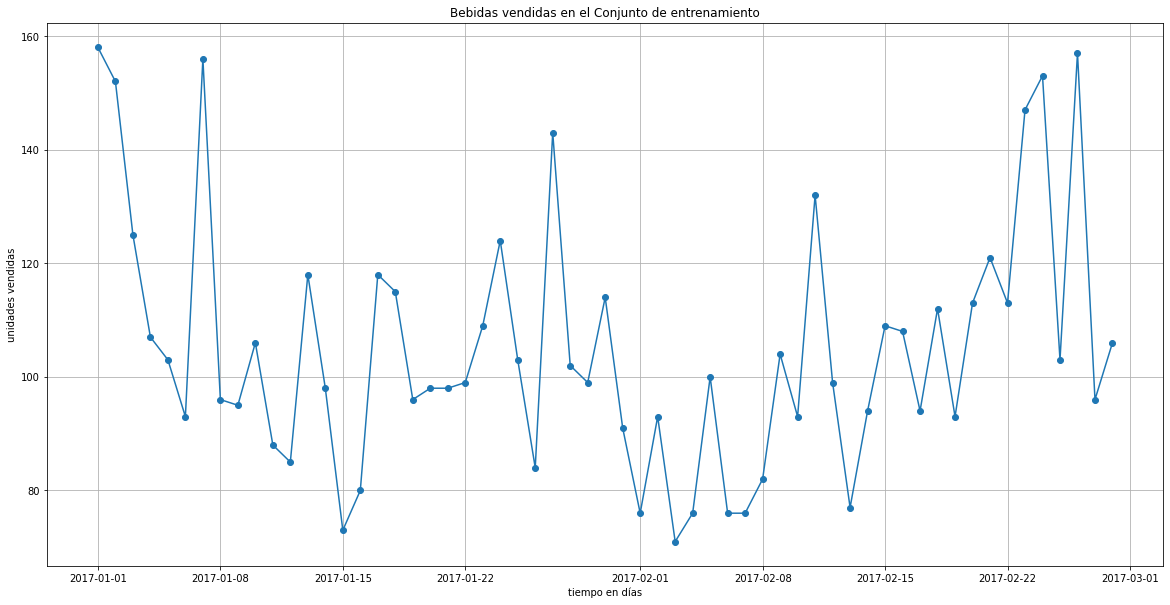

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train["unidades"].loc["2017-01":"2017-02"], marker = "o", linestyle = "-");
ax.grid();
ax.set_ylabel("unidades vendidas")
ax.set_xlabel("tiempo en días")
ax.set_title("Bebidas vendidas en el Conjunto de entrenamiento");

In [ ]:
train.loc["2017-01"]

,precio,unidades,ingreso_total
ds,,,
2017-01-01,990.0,158,142740
2017-01-02,990.0,152,137180
2017-01-03,990.0,125,115390
2017-01-04,990.0,107,98710
2017-01-05,990.0,103,96270
2017-01-06,990.0,93,84808
2017-01-07,990.0,156,138290
2017-01-08,990.0,96,86110
2017-01-09,990.0,95,89490


Text(0.5, 1.0, 'Gráficos de cajas por dias de la semana')

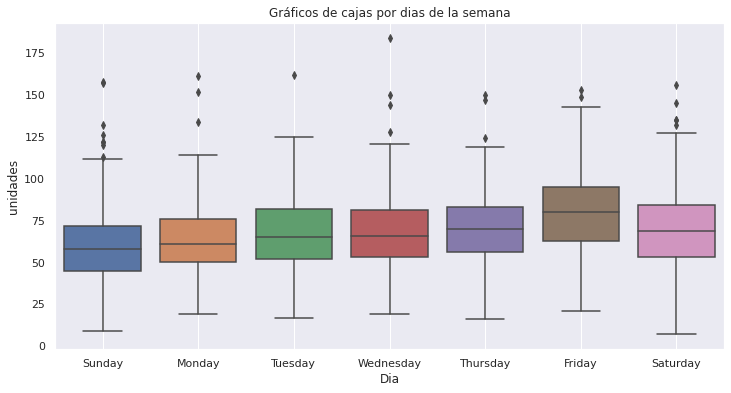

In [ ]:
#fig, ax = sbn.boxplot(figsize=(20, 10))
sbn.set(rc = {"figure.figsize": (12, 6)})
ax = sbn.boxplot(data = train, x = "Dia", y = "unidades");
ax.grid();
ax.set_title("Gráficos de cajas por dias de la semana")


In [ ]:
grouped_data_diario = train.groupby("Dia")

In [ ]:
grouped_data_diario["unidades"].describe()

,count,mean,std,min,25%,50%,75%,max
Dia,,,,,,,,
Friday,265.0,79.369811,24.345039,21.0,63.0,80.0,95.00,153.0
Monday,266.0,63.285714,21.156763,19.0,50.0,61.0,75.75,161.0
Saturday,264.0,69.750000,25.195773,7.0,53.0,69.0,84.00,156.0
Sunday,265.0,60.683019,24.042054,9.0,45.0,58.0,72.00,158.0
Thursday,265.0,70.316981,21.360308,16.0,56.0,70.0,83.00,150.0
Tuesday,265.0,67.260377,22.784650,17.0,52.0,65.0,82.00,162.0
Wednesday,264.0,68.568182,23.851312,19.0,53.0,66.0,81.25,184.0


In [ ]:
estadisticos_diarios = grouped_data_diario["unidades"].describe()

In [ ]:
estadisticos_diarios.to_excel("estadisticos diarios.xlsx")

#Análisis Diario
A partir de los diagramas de cajas diarios, es posible evidenciar que el mejor dia para las ventas es el dia viernes, ya que en este dia podemos vender desde 21 hasta casi 153 bebidas diarias, ademas el valor de la mediana en el dia viernes es la mas alta, llegando a 80 bebidas y su promedio es de 79 bebidas, por lo que este dia tambien posee una excelente simetria, ya que los datos se encuentran distribuidos de forma normal con respecto al promedio. Ademas se puede observar que los dias que mas se vende bebidas son el viernes y el sabado, debido a que las personas salen de sus trabajos el viernes y por la vida bohemia que tiene el litoral central, las personas desean beber más, aquellos días en los que saben que al siguiente no deberán trabajar, lo que tiene mucho sentido. Es importante destacar que los dias viernes y sabados poseen una mayor dispersión o variabilidad de las unidades vendidas de bebidas, en comparacion a los dias domingos, lunes, martes, miercoles y jueves, esto puede atribuirse al efecto que posee los dias en que las personas estan recien pagadas, es decir, las personas son mas predispuestas a gastar y comprar un mayor numero de bebidas cuando tienen mas dinero es sus bolsillos, pero esto solo ocurre 1 vez al mes, y ademas los viernes y sabados se dan solo 1 vez a la semana, por lo que existira 1 fin de semana al mes, donde las personas compraran mas bebidas y los demas fines de semana, las personas decidiran no comprar tantas bebidas como aquel fin de semana donde estan recien pagados, pero en los dias de semana (domingo, lunes, martes, miercoles y jueves), las personas consumiran de forma normal, ya que independiente si estan pagados o no, compraran lo justo, ya que no pueden celebrar ni tampoco disponen de tanto tiempo debido al trabajo.


In [ ]:
train[train["Dia"] == "Friday"].describe()

,precio,unidades,ingreso_total,Año
count,265.000000,265.000000,265.000000,265.000000
mean,1040.830189,79.369811,78170.033962,2019.052830
std,66.315858,24.345039,23176.867574,1.455476
min,990.000000,21.000000,22770.000000,2017.000000
25%,990.000000,63.000000,64400.000000,2018.000000
50%,990.000000,80.000000,78400.000000,2019.000000
75%,1100.000000,95.000000,93060.000000,2020.000000
max,1150.000000,153.000000,147510.000000,2022.000000


Text(0.5, 1.0, 'Gráficos de cajas por meses')

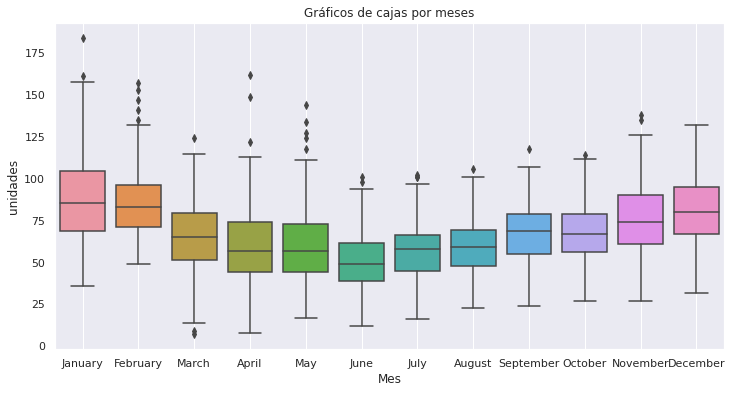

In [ ]:
sbn.set(rc = {"figure.figsize": (12, 6)})
ax = sbn.boxplot(data = train, x = "Mes", y = "unidades");
ax.grid();
ax.set_title("Gráficos de cajas por meses")


#Análisis mensual
Segun el grafico de cajas mensual, se puede observar los mejores meses para la venta de bebidas son Enero y Febrero, ya que en el mes de enero el 50% de las ventas totales registradas, se venden entre 68 a 104 bebidas al dia, con un promedio de 88 bebidas.
En Febrero, el 50% de todas las ventas comprende desde 71 a 96 bebidas al dia, con un promedio de 86 bebidas diarias.
Se puede observar la estacionaridad que poseen las ventas de bebidas a lo largo de los meses, ya que la mediana y la cantidad de unidades vendidas ira disminuyendo paulatinamente desde el mes de Marzo hasta Junio que es el mes donde menos se vende bebidas, y a partir de este mes de Junio, las unidades vendidas vuelven a subir de forma constante y creciente hasta llegar a la epoca de verano, donde tienen su maximo valor.

Es importante mencionar que existen valores que se escapan a los graficos de cajas o bigotes y el numero de datos escapados aumenta notoriamente en el mes de Febrero y Mayo, estos grandes valores de unidades vendidas de bebidas, pueden explicarse debido a las promociones que existen durante estos meses, ya que febrero es el ultimo mes de las vacaciones y es la oportunidad para capturar un mayor numero de ventas mensuales, y las promociones son una medida efectiva para lograr un mayor numero de ventas puntuales, tambien en el mes de Mayo y Abril se registran ventas que se encuentran sobre el limite superior del diagrama de caja, existen dias en estos meses en los cuales se vende por sobre el maximo del diagrama de cajas, esto es explicable debido a que en Abril existe la semana santa, donde las personas viajan al litoral central y en estos dias, existe una gran demanda de bebidas, ademas de Mayo, donde existen 2 feriados, el dia del trabajador y el combate naval de Iquique, dias que pueden posibilidad un fin de semana largo y con ello el aumento de ventas por parte de las personas.



In [ ]:
train[train["Mes"] == "January"].describe()

,precio,unidades,ingreso_total,Año
count,186.000000,186.000000,186.000000,186.000000
mean,1036.107527,88.376344,87451.521505,2019.500000
std,65.130134,26.925689,25051.086312,1.712435
min,990.000000,36.000000,32220.000000,2017.000000
25%,990.000000,68.500000,70028.500000,2018.000000
50%,990.000000,85.500000,85610.000000,2019.500000
75%,1100.000000,104.750000,100775.000000,2021.000000
max,1150.000000,184.000000,176273.000000,2022.000000


In [ ]:
train[train["Mes"] == "February"].describe()

,precio,unidades,ingreso_total,Año
count,141.000000,141.000000,141.000000,141.000000
mean,1034.822695,85.921986,84227.283688,2019.007092
std,63.241068,20.163996,17539.681742,1.416719
min,990.000000,49.000000,51450.000000,2017.000000
25%,990.000000,71.000000,70530.000000,2018.000000
50%,990.000000,83.000000,84150.000000,2019.000000
75%,1050.000000,96.000000,92800.000000,2020.000000
max,1150.000000,157.000000,140990.000000,2021.000000


Text(0.5, 1.0, 'Gráficos de cajas por Año')

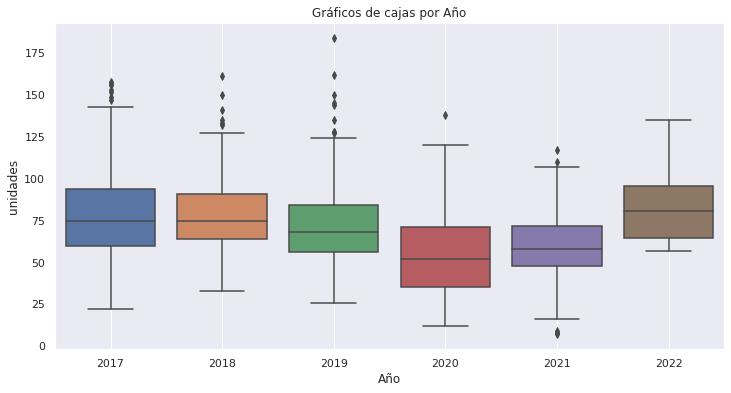

In [ ]:
sbn.set(rc = {"figure.figsize": (12, 6)})
ax = sbn.boxplot(data = train, x = "Año", y = "unidades");
ax.grid();
ax.set_title("Gráficos de cajas por Año")

#Análisis por año
De forma anual, es posible observar que el año con las mejores ventas es el 2017, donde la cantidad vendida ha ido descendiendo durante el 2018 y 2019 hasta llegar al nivel de ventas mas bajo en el año 2020, esto es producto de la pandemia global Covid-19 que obligo a las personas a cuarentenarse en sus hogares y no permitir que las personas viajaran a regiones o existiesen eventos o fiestas, producto de esta situacion, las ventas en las bebidas bajan notoriamente e inlcuso se modifica la distribucion en las ventas, ya que para el año 2020, el valor de la mediana se encuentra mas cercana al cuartil 1 (25% de las ventas) por lo que existe una mayor concentracion de ventas situadas por dejado del cuartil 2 (52 bebidas), lo que es negativo, ya es es mas probable obtener ventas por dejado de 52 bebidas que obtener ventas sobre las 52 bebidas.

Tambien es posible evidenciar que el año 2020 es un año negativo en cuando a ventas, debido a que el promedio de ventas registrado para el año 2020 es el menor (54 bebidas diarias) en comparacion a los demas años, ademas de que ese año registra el menor valor de la mediana, es decir, el 50% de los ventas totales durante el 2020, se encuentran por debajo de las 52 bebidas diarias.

La tendencia a lo largo del tiempo es una disminucion de la demanda desde el 2017 hasta el año 2020, que luego experimenta una leve recuperacion durante el 2021 debido al fin de las restricciones de cuarentena y a la reactivacion de la economia chilena.

In [ ]:
grouped_data = train.groupby("Año")

In [ ]:
grouped_data["unidades"].describe()

,count,mean,std,min,25%,50%,75%,max
Año,,,,,,,,
2017,364.0,78.170330,24.058666,22.0,60.00,75.0,94.0,158.0
2018,365.0,77.421918,21.094699,33.0,64.00,75.0,91.0,161.0
2019,365.0,71.194521,23.586595,26.0,56.00,68.0,84.0,184.0
2020,366.0,54.459016,22.375065,12.0,35.25,52.0,71.0,138.0
2021,363.0,59.829201,17.886182,7.0,48.00,58.0,72.0,117.0
2022,31.0,83.000000,21.096603,57.0,64.50,81.0,95.5,135.0


In [ ]:
datos_por_año = grouped_data["unidades"].describe()

In [ ]:
datos_por_año.to_excel("estadisticos por año.xlsx")

#Análisis de la Normalidad para las ventas diarias

In [ ]:
train

,precio,unidades,ingreso_total,ingreso_calculado,diferencia,Año,Mes,Dia
ds,,,,,,,,
2017-01-01,990.0,158,142740,156420.0,13680.0,2017,January,Sunday
2017-01-02,990.0,152,137180,150480.0,13300.0,2017,January,Monday
2017-01-03,990.0,125,115390,123750.0,8360.0,2017,January,Tuesday
2017-01-04,990.0,107,98710,105930.0,7220.0,2017,January,Wednesday
2017-01-05,990.0,103,96270,101970.0,5700.0,2017,January,Thursday
...,...,...,...,...,...,...,...,...
2022-01-27,1100.0,63,68510,69300.0,790.0,2022,January,Thursday
2022-01-28,1100.0,85,93088,93500.0,412.0,2022,January,Friday
2022-01-29,1100.0,95,103920,104500.0,580.0,2022,January,Saturday


#Gráficos Q-Q Plots

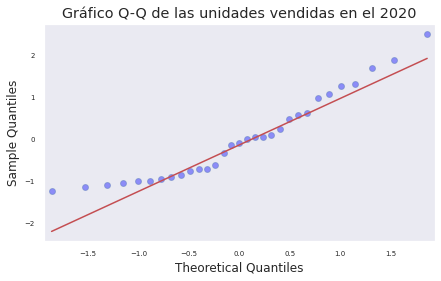

In [ ]:
### grafico Q-Q
datos = train["unidades"].loc["2022"]

fig, ax = plt.subplots(figsize = (7, 4))
plt.style.use("ggplot")
sm.qqplot(datos, fit = True, line = "q",
          alpha = 0.4, lw = 2, ax = ax)
ax.set_title("Gráfico Q-Q de las unidades vendidas en el 2020")
ax.grid();
ax.tick_params(labelsize = 7)


#Histogramas para analizar la normalidad en los datos de las unidades vendidas

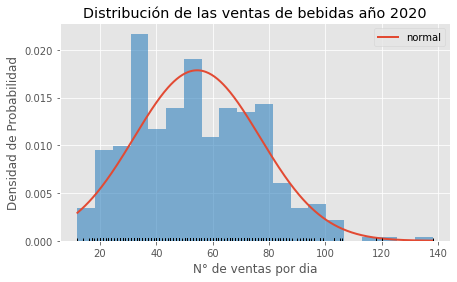

In [ ]:
datos = train["unidades"].loc["2020"]


mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize = (7, 4))
ax.plot(x_hat, y_hat, linewidth = 2, label = "normal")
ax.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
ax.plot(datos, np.full_like(datos, -0.01), "|k", markeredgewidth = 1)
ax.set_title("Distribución de las ventas de bebidas año 2020")
ax.set_xlabel("N° de ventas por dia")
ax.set_ylabel("Densidad de Probabilidad")
ax.legend();




In [ ]:
### prueba de shapiro wilk
shapiro_test_2017 = stats.shapiro(train["unidades"].loc["2017"])
shapiro_test_2018 = stats.shapiro(train["unidades"].loc["2018"])
shapiro_test_2019 = stats.shapiro(train["unidades"].loc["2019"])
shapiro_test_2020 = stats.shapiro(train["unidades"].loc["2020"])
shapiro_test_2021 = stats.shapiro(train["unidades"].loc["2021"])
print("Año 2017")
print(shapiro_test_2017)
print("----------------------------------------------------------------")
print("Año 2018")
print(shapiro_test_2018)
print("----------------------------------------------------------------")
print("Año 2019")
print(shapiro_test_2019)
print("----------------------------------------------------------------")
print("Año 2020")
print(shapiro_test_2020)
print("----------------------------------------------------------------")
print("Año 2021")
print(shapiro_test_2021)

Año 2017
ShapiroResult(statistic=0.96815425157547, pvalue=3.838851796444942e-07)
----------------------------------------------------------------
Año 2018
ShapiroResult(statistic=0.9795181155204773, pvalue=4.728844214696437e-05)
----------------------------------------------------------------
Año 2019
ShapiroResult(statistic=0.9590422511100769, pvalue=1.4611113208218285e-08)
----------------------------------------------------------------
Año 2020
ShapiroResult(statistic=0.9767929315567017, pvalue=1.2974011042388156e-05)
----------------------------------------------------------------
Año 2021
ShapiroResult(statistic=0.9953119158744812, pvalue=0.3450271189212799)


In [ ]:
k2, p_value = stats.normaltest(train["unidades"].loc["2017"])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 28.47920003400215, p-value = 6.543653403972958e-07


In [ ]:
data_point = np.random.normal(0, 1, 100)

In [ ]:
shapiro_test_data_point = stats.shapiro(data_point)

In [ ]:
print(shapiro_test_data_point)

ShapiroResult(statistic=0.9944078326225281, pvalue=0.9567710161209106)


(array([ 2.,  5., 15., 11., 20., 14., 17., 11.,  3.,  2.]),
 array([-2.47870267, -1.94630735, -1.41391204, -0.88151672, -0.3491214 ,
         0.18327391,  0.71566923,  1.24806455,  1.78045986,  2.31285518,
         2.8452505 ]),
 <a list of 10 Patch objects>)

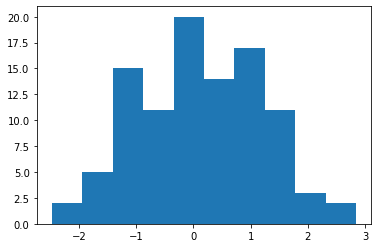

In [ ]:
plt.hist(data_point)

In [ ]:
train["unidades"].loc["2020"].describe()

count    366.000000
mean      54.459016
std       22.375065
min       12.000000
25%       35.250000
50%       52.000000
75%       71.000000
max      138.000000
Name: unidades, dtype: float64

In [ ]:
train

,precio,unidades,ingreso_total,Año,Mes,Dia
ds,,,,,,
2017-01-01,990.0,158,142740,2017,January,Sunday
2017-01-02,990.0,152,137180,2017,January,Monday
2017-01-03,990.0,125,115390,2017,January,Tuesday
2017-01-04,990.0,107,98710,2017,January,Wednesday
2017-01-05,990.0,103,96270,2017,January,Thursday
...,...,...,...,...,...,...
2022-01-27,1100.0,63,68510,2022,January,Thursday
2022-01-28,1100.0,85,93088,2022,January,Friday
2022-01-29,1100.0,95,103920,2022,January,Saturday


In [ ]:
datos = train["unidades"].loc["2020"]


mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize = (7, 4))
ax.plot(x_hat, y_hat, linewidth = 2, label = "normal")
ax.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
ax.plot(datos, np.full_like(datos, -0.01), "|k", markeredgewidth = 1)
ax.set_title("Distribución de las ventas de bebidas año 2020")
ax.set_xlabel("N° de ventas por dia")
ax.set_ylabel("Densidad de Probabilidad")
ax.legend();



ValueError: ignored

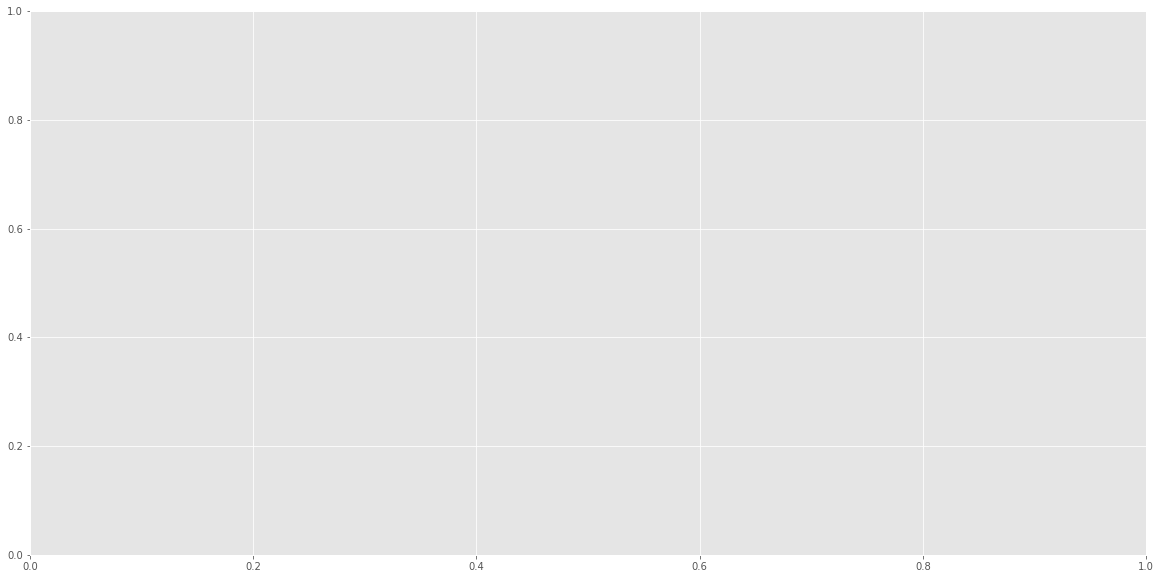

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
ax.hist(grouped_data["unidades"])

Año
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
2022    AxesSubplot(0.125,0.125;0.775x0.755)
Name: unidades, dtype: object

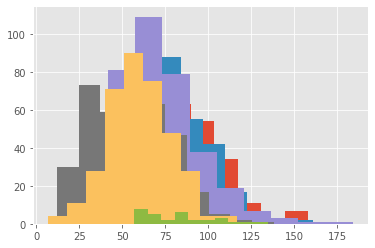

In [ ]:
grouped_data["unidades"].hist()

In [ ]:
train["unidades"]["2020"].describe()

count    366.000000
mean      54.459016
std       22.375065
min       12.000000
25%       35.250000
50%       52.000000
75%       71.000000
max      138.000000
Name: unidades, dtype: float64

In [ ]:
train["unidades"].describe()

count    1854.000000
mean       68.458468
std        23.897066
min         7.000000
25%        52.000000
50%        67.000000
75%        83.000000
max       184.000000
Name: unidades, dtype: float64

In [ ]:
datos = train["unidades"].loc["2020"]


mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize = (7, 4))
ax.plot(x_hat, y_hat, linewidth = 2, label = "normal")
ax.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
ax.plot(datos, np.full_like(datos, -0.01), "|k", markeredgewidth = 1)
ax.set_title("Distribución de las ventas de bebidas año 2020")
ax.set_xlabel("N° de ventas por dia")
ax.set_ylabel("Densidad de Probabilidad")
ax.legend();


Text(0.5, 1.0, 'Año 2021')

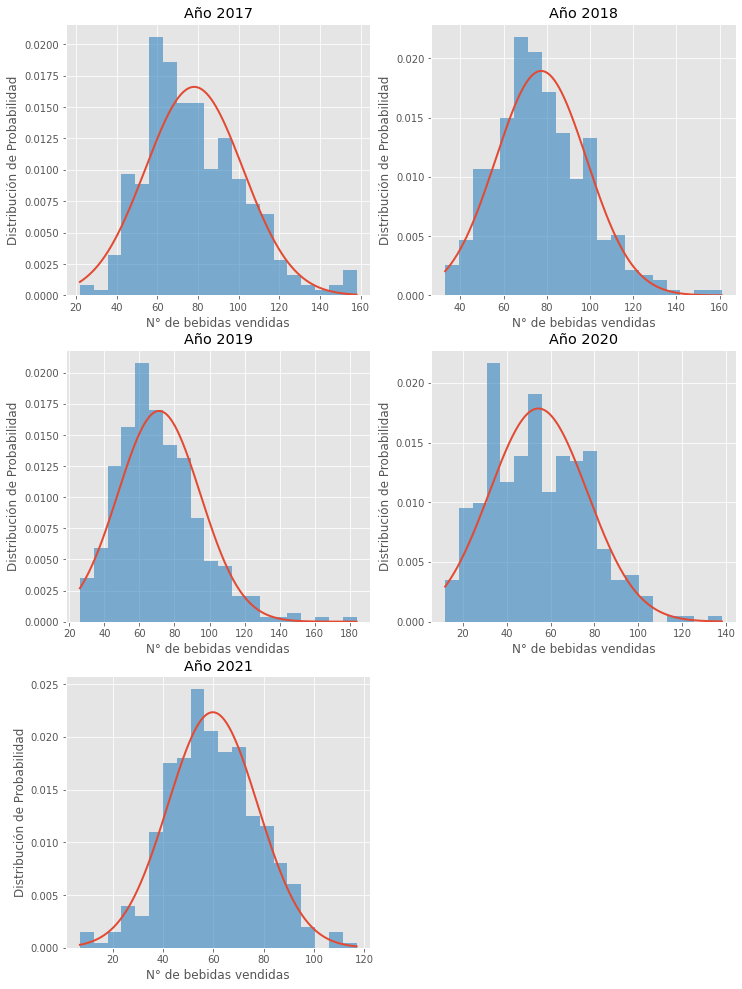

In [ ]:
plt.figure(figsize = (12, 17))

plt.subplot(3, 2, 1)
datos = train["unidades"].loc["2017"]
mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)
plt.plot(x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
plt.ylabel("Distribución de Probabilidad")
plt.xlabel("N° de bebidas vendidas")
plt.title("Año 2017")

plt.subplot(3, 2, 2)
datos = train["unidades"].loc["2018"]
mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)
plt.plot(x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
plt.ylabel("Distribución de Probabilidad")
plt.xlabel("N° de bebidas vendidas")
plt.title("Año 2018")

plt.subplot(3, 2, 3)
datos = train["unidades"].loc["2019"]
mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)
plt.plot(x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
plt.ylabel("Distribución de Probabilidad")
plt.xlabel("N° de bebidas vendidas")
plt.title("Año 2019")

plt.subplot(3, 2, 4)
datos = train["unidades"].loc["2020"]
mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)
plt.plot(x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
plt.ylabel("Distribución de Probabilidad")
plt.xlabel("N° de bebidas vendidas")
plt.title("Año 2020")

plt.subplot(3, 2, 5)
datos = train["unidades"].loc["2021"]
mu, sigma = stats.norm.fit(datos)
x_hat = np.linspace(min(datos), max(datos), num = len(datos))
y_hat = stats.norm.pdf(x_hat, mu, sigma)
plt.plot(x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist(x = datos, density = True, bins = 20, color = "#3182bd", alpha = 0.6)
plt.ylabel("Distribución de Probabilidad")
plt.xlabel("N° de bebidas vendidas")
plt.title("Año 2021")


Text(0.5, 1.0, 'Año 2020')

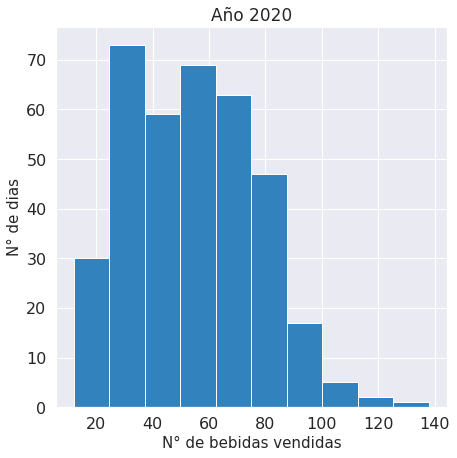

In [ ]:
plt.figure(figsize = (7, 7))
a = 15
b = 17
plt.hist(train["unidades"].loc["2020"], color ="#3182bd" )
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas", fontsize=a)
plt.title("Año 2020", fontsize=b)

Text(0.5, 1.0, 'Año 2021')

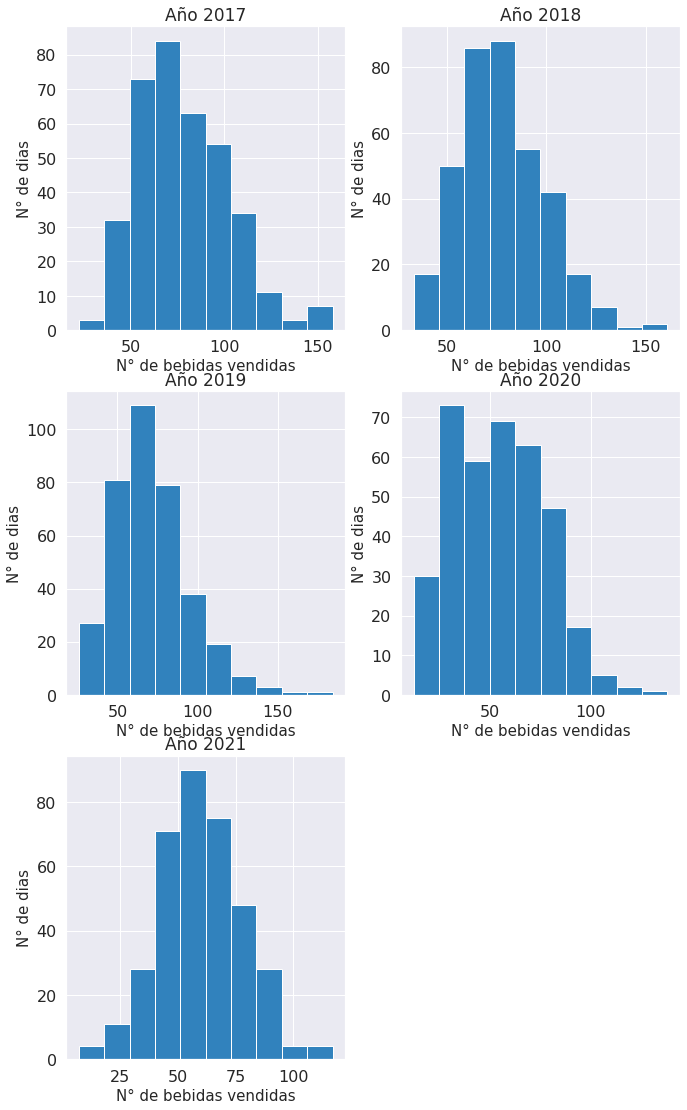

In [ ]:
plt.figure(figsize = (11, 19))
a = 15
b = 17

plt.subplot(3, 2, 1)
plt.hist(train["unidades"].loc["2017"], color ="#3182bd" )
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas", fontsize=a)
plt.title("Año 2017", fontsize=b)
plt.subplot(3, 2, 2)
plt.hist(train["unidades"].loc["2018"], color ="#3182bd")
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas", fontsize=a)
plt.title("Año 2018", fontsize=b)
plt.subplot(3, 2, 3)
plt.hist(train["unidades"].loc["2019"], color ="#3182bd")
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas", fontsize=a)
plt.title("Año 2019", fontsize=b)
plt.subplot(3, 2, 4)
plt.hist(train["unidades"].loc["2020"], color ="#3182bd")
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas", fontsize=a)
plt.title("Año 2020", fontsize=b)
plt.subplot(3, 2, 5)
plt.hist(train["unidades"].loc["2021"], color ="#3182bd")
plt.ylabel("N° de dias", fontsize=a)
plt.xlabel("N° de bebidas vendidas" , fontsize=a)
plt.title("Año 2021", fontsize=b)



#Análisis de histogramas:
A traves de los 5 histogramas para cada año desdel el 2017 al 2021, es posible evidenciar que la cantidad de bebidas vendidas se distribuye de forma normal para todos los años, excepto para el 2020, donde la distribucion del numero de ventas de bebidas se aleja de la distribucion normal, esto se debe al efecto de la pandemia, la cual altera y disminuye la demanda de los consumidores debido a las cuarentenas establecidas en el país, donde para el año 2020, se observa que el numero de bebidas vendidas disminuye, ya que el promedio de bebidas vendidas para ese año baja en comparacion a los demas años y existe una mayor tendencia a vender durante mas dias una menor cantidad de bebidas.

se vendieron durante mas de 400 dias, alrededor de 50 bebidas por dia.
Tambien se concluye que el promedio de bebidas vendidas es de 68 bebidas al dia y que la cantidad de bebidas vendidas se distribuye de forma normal, donde existe una gran cantidad de dias en que se vende un total de entre 50 y 100 bebidas por dia.

Text(0.5, 1.0, 'Histograma Año 2021')

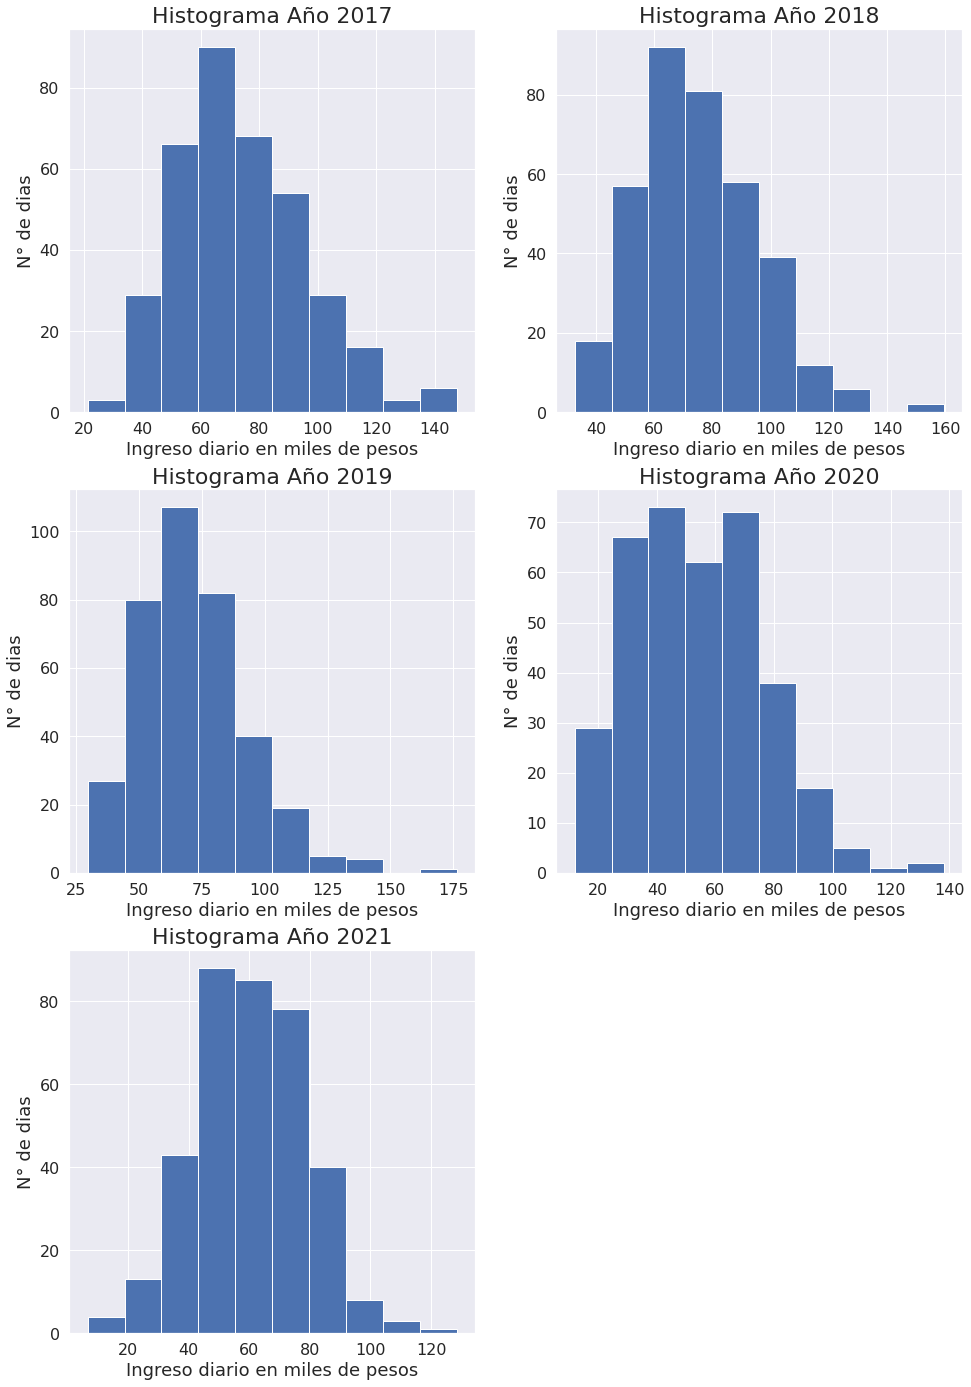

In [ ]:
params = {'xtick.labelsize': 16, 'ytick.labelsize': 16}
mpl.rcParams.update(params)


plt.figure(figsize = (16, 24))

plt.subplot(3, 2, 1)
plt.hist((train["ingreso_total"]/1000).loc["2017"])
plt.ylabel("N° de dias",fontsize=18)
plt.xlabel("Ingreso diario en miles de pesos",fontsize=18)
plt.title("Histograma Año 2017",fontsize=22)
plt.subplot(3, 2, 2)
plt.hist((train["ingreso_total"]/1000).loc["2018"])
plt.ylabel("N° de dias",fontsize=18)
plt.xlabel("Ingreso diario en miles de pesos",fontsize=18)
plt.title("Histograma Año 2018",fontsize=22)
plt.subplot(3, 2, 3)
plt.hist((train["ingreso_total"]/1000).loc["2019"])
plt.ylabel("N° de dias",fontsize=18)
plt.xlabel("Ingreso diario en miles de pesos",fontsize=18)
plt.title("Histograma Año 2019",fontsize=22)
plt.subplot(3, 2, 4)
plt.hist((train["ingreso_total"]/1000).loc["2020"])
plt.ylabel("N° de dias" ,fontsize=18)
plt.xlabel("Ingreso diario en miles de pesos" ,fontsize=18)
plt.title("Histograma Año 2020" ,fontsize=22)
plt.subplot(3, 2, 5)
plt.hist((train["ingreso_total"]/1000).loc["2021"])
plt.ylabel("N° de dias" ,fontsize=18)
plt.xlabel("Ingreso diario en miles de pesos",fontsize=18)
plt.title("Histograma Año 2021",fontsize=22)


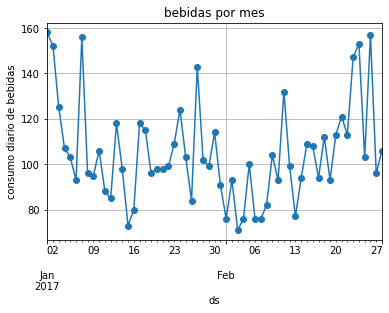

In [ ]:
eje = train.loc["2017-01":"2017-02", "unidades"].plot(marker= "o", 
                                                      linestyle = "-")
eje.set_ylabel("consumo diario de bebidas")
eje.set_title("bebidas por mes")
e
eje.grid()

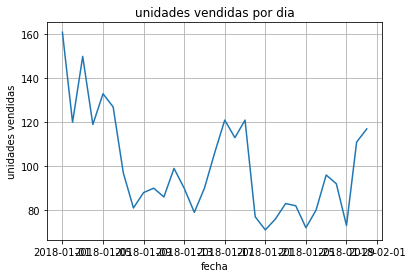

In [ ]:
plt.plot(train["unidades"].loc["2018-01-01":"2018-01-31"], label = "unidades totales de train")
plt.grid()
plt.title("unidades vendidas por dia")
plt.xlabel("fecha")
plt.ylabel("unidades vendidas")
plt.show()

In [ ]:
print(len(train))

1854


In [ ]:
#comienza con el dia domingo 
i = 1
z = 1
lista = []
while i <=7 and z < (len(train)):
  if i == 1:
    lista.append("domingo")
    i = i + 1
    z = z + 1
  if i == 2:
    lista.append("lunes")
    i = i + 1
    z = z + 1
  if i == 3:
    lista.append("martes")
    i = i + 1
    z = z + 1
  if i == 4:
    lista.append("miercoles")
    i = i + 1
    z = z + 1
  if i == 5:
    lista.append("jueves")
    i = i + 1 
    z = z + 1 
  if i == 6:
    lista.append("viernes")
    i = i + 1
    z = z + 1
  if i == 7:
    lista.append("sabado")
    i = 1
    z = z + 1
  

In [ ]:
print(lista)

['domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'mierco

In [ ]:
print(len(lista))

1855


In [ ]:
dias = lista[: -1]

In [ ]:
print(dias)
print(len(dias))

['domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo', 'lunes', 'martes', 'mierco

In [ ]:
train.insert(loc = 3, column = "dia", value = dias)

In [ ]:
print(train)

            precio  unidades  ingreso_total        dia
ds                                                    
2017-01-01   990.0       158         142740    domingo
2017-01-02   990.0       152         137180      lunes
2017-01-03   990.0       125         115390     martes
2017-01-04   990.0       107          98710  miercoles
2017-01-05   990.0       103          96270     jueves
...            ...       ...            ...        ...
2022-01-27  1100.0        63          68510      lunes
2022-01-28  1100.0        85          93088     martes
2022-01-29  1100.0        95         103920  miercoles
2022-01-30  1100.0        62          67375     jueves
2022-01-31  1100.0        68          74100    viernes

[1854 rows x 4 columns]


In [ ]:
lunes = train[train["dia"] == "lunes"]
martes = train[train["dia"] == "martes"]
miercoles = train[train["dia"] == "miercoles"]
jueves = train[train["dia"] == "jueves"]
viernes = train[train["dia"] == "viernes"]
sabado = train[train["dia"] == "sabado"]
domingo = train[train["dia"] == "domingo"]



In [ ]:
print(lunes["unidades"].describe(), martes["unidades"].describe(), miercoles["unidades"].describe(), 
      jueves["unidades"].describe(), viernes["unidades"].describe(), sabado["unidades"].describe(), 
      domingo["unidades"].describe())

count    265.000000
mean      68.196226
std       22.746112
min       17.000000
25%       52.000000
50%       66.000000
75%       83.000000
max      162.000000
Name: unidades, dtype: float64 count    265.000000
mean      69.867925
std       24.427721
min       19.000000
25%       54.000000
50%       67.000000
75%       83.000000
max      184.000000
Name: unidades, dtype: float64 count    265.000000
mean      69.909434
std       21.498223
min       16.000000
25%       55.000000
50%       70.000000
75%       83.000000
max      150.000000
Name: unidades, dtype: float64 count    265.000000
mean      77.464151
std       24.799645
min       21.000000
25%       60.000000
50%       78.000000
75%       94.000000
max      149.000000
Name: unidades, dtype: float64 count    265.000000
mean      68.588679
std       24.686532
min        7.000000
25%       51.000000
50%       68.000000
75%       83.000000
max      153.000000
Name: unidades, dtype: float64 count    264.000000
mean      60.943182
std  

<BarContainer object of 1854 artists>

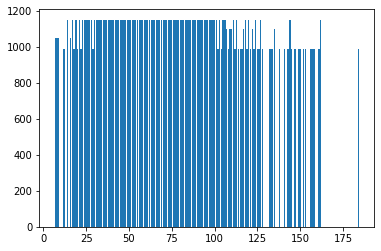

In [ ]:
plt.bar(train["unidades"], height = train["precio"])

precio           1.000000
ingreso_total   -0.102041
unidades        -0.195588
Name: precio, dtype: float64

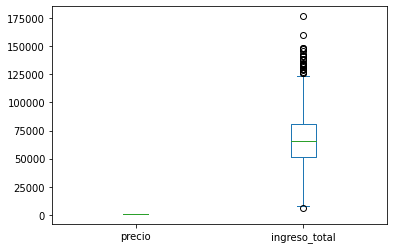

In [ ]:
train.plot(kind = "box", x = "")

corr_matrix = train.corr()
corr_matrix["precio"].sort_values(ascending = False)

In [ ]:
!pip install skforecast

In [ ]:
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Configuración warnings
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123, n_estimators = 500, n_jobs = -1, max_depth= 10, criterion = "squared_error"),
                lags = 30
             )

forecaster.fit(y=datos['unidades'])
forecaster

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=100, n_estimators=500, n_jobs=-1,
                      random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30] 
Transformer for y: None 
Transformer for exog: None 
Window size: 30 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1853] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2023-01-13 04:10:15 
Last fit date: 2023-01-13 04:10:26 
Skfore

In [ ]:
steps = 28
predicciones = forecaster.predict(steps=steps)
print(predicciones)
print(len(predicciones))

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


30    72.276
31    77.210
32    80.782
33    74.842
34    74.928
35    71.350
36    69.930
37    70.886
38    73.048
39    72.578
40    77.306
41    78.550
42    71.596
43    71.726
44    74.304
45    73.264
46    76.060
47    74.002
48    73.806
49    73.740
50    74.926
51    72.472
52    72.972
53    75.840
54    75.582
55    73.212
56    71.822
57    72.184
Name: pred, dtype: float64
28


In [ ]:
pred = pd.DataFrame({"date": pd.date_range(start = "2022-02-01", periods = 28, 
                                           freq = "D"), "unidades": predicciones})

In [ ]:
print(pred)

         date  unidades
30 2022-02-01    72.276
31 2022-02-02    77.210
32 2022-02-03    80.782
33 2022-02-04    74.842
34 2022-02-05    74.928
35 2022-02-06    71.350
36 2022-02-07    69.930
37 2022-02-08    70.886
38 2022-02-09    73.048
39 2022-02-10    72.578
40 2022-02-11    77.306
41 2022-02-12    78.550
42 2022-02-13    71.596
43 2022-02-14    71.726
44 2022-02-15    74.304
45 2022-02-16    73.264
46 2022-02-17    76.060
47 2022-02-18    74.002
48 2022-02-19    73.806
49 2022-02-20    73.740
50 2022-02-21    74.926
51 2022-02-22    72.472
52 2022-02-23    72.972
53 2022-02-24    75.840
54 2022-02-25    75.582
55 2022-02-26    73.212
56 2022-02-27    71.822
57 2022-02-28    72.184


In [ ]:
pred = pred.set_index("date")

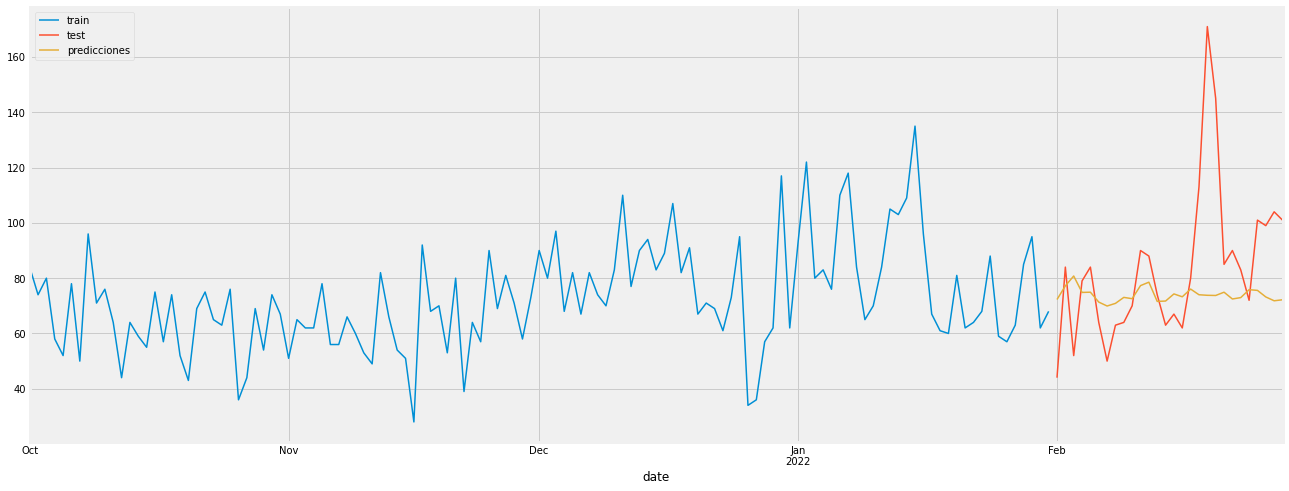

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(20, 8))
datos['unidades'].loc["2021-10-01":].plot(ax=ax, label='train')
test['unidades'].plot(ax=ax, label='test')
pred["unidades"].plot(ax=ax, label='predicciones')
ax.legend();

In [ ]:
# Error test
# ==============================================================================
error_mse = mean_squared_error(
                y_true = test['unidades'],
                y_pred = pred["unidades"]
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 740.5976272857141


In [ ]:
datos_train["ds"] = pd.to_datetime(datos_train["ds"], format = "%Y/%m/%d")
datos = datos_train.set_index("ds")
datos = datos.rename(columns = {"ds": "fecha", "precio_ref": "precio", 
                                "unidades_total": "unidades", 
                                "monto_total": "ingreso_total"})
#datos = datos.asfreq("D", how = {"2017-01-01", "2022-01-30"})
datos = datos.sort_index()


In [ ]:
steps = 30
predicciones = forecaster.predict(steps=steps)
predicciones.head(5)

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


6     72.86
7     75.28
8     80.96
9     77.18
10    72.31
Name: pred, dtype: float64

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
train['unidades_total'].plot(ax=ax, label='train')
test['unidades_total'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8b05d191f0> (for post_execute):


ValueError: ignored

ValueError: ignored

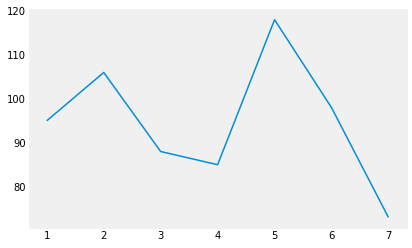

In [ ]:
a = train.loc["2017-01-09":"2017-01-15"]
#print(a)
b = len(a)
c = range(1, b+1)

plt.plot(c, a["unidades_total"])
plt.grid()
plt.show()

In [ ]:



plt.plot(train["unidades_total"], label = "unidades totales de train")
plt.grid()
plt.title("unidades vendidas por dia")
plt.xlabel("fecha")
plt.ylabel("unidades vendidas")
plt.show()

In [ ]:
datos_test = pd.read_csv("/content/dataset_ts_ventas_test.csv", index_col = 0, parse_dates=True)

In [ ]:
print(datos_test)

            precio_ref  unidades_total  monto_total
ds                                                 
2022-02-01      1100.0              44        48400
2022-02-02      1100.0              84        92255
2022-02-03      1100.0              52        57055
2022-02-04      1100.0              79        86755
2022-02-05      1100.0              84        92110
2022-02-06      1100.0              64        70110
2022-02-07      1100.0              50        54855
2022-02-08      1100.0              63        69010
2022-02-09      1100.0              64        70400
2022-02-10      1100.0              70        76733
2022-02-11      1100.0              90        98710
2022-02-12      1100.0              88        96800
2022-02-13      1100.0              74        81133
2022-02-14      1100.0              63        68720
2022-02-15      1100.0              67        73410
2022-02-16      1100.0              62        67910
2022-02-17      1100.0              80        87298
2022-02-18  

In [ ]:
a = datos_test.loc["2022-02-20": "2022-02-28"]
print(a)

            precio_ref  unidades_total  monto_total
ds                                                 
2022-02-20      1100.0             145       158775
2022-02-21      1100.0              85        93500
2022-02-22      1100.0              90        98855
2022-02-23      1100.0              83        91033
2022-02-24      1100.0              72        78643
2022-02-25      1100.0             101       109887
2022-02-26      1100.0              99       108610
2022-02-27      1100.0             104       113019
2022-02-28      1100.0             101       110371


In [ ]:
print(enero_2017)

Empty DataFrame
Columns: [fecha, precio, unidades, monto total]
Index: []


In [ ]:
datos = data_train.copy()

In [ ]:
datos = pd.to_datetime(datos["ds"], )

In [ ]:
print(datos)
datos = 

0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
1849   2022-01-27
1850   2022-01-28
1851   2022-01-29
1852   2022-01-30
1853   2022-01-31
Name: ds, Length: 1854, dtype: datetime64[ns]


In [ ]:
datos = datos.insert(1, "precio", data_train["precio_ref"])

AttributeError: ignored